# Visualizaciones

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Cargar los archivos con los resultados

In [2]:
# Cargar el archivo CSV
archivo_csv = './riskfactors_results.csv'
riskfactors_df = pd.read_csv(archivo_csv)

riskfactors_df

,ID,Modelo,Precisión global,Precision AD,Recall AD,AUC ROC AD
0,1,Decision Tree,93.123,90.052,90.526,92.533
1,2,Random Forest,94.424,94.944,88.947,93.181
2,3,SVM,82.900,76.923,73.684,80.808
3,4,KNN Model,76.952,76.190,50.526,70.953
4,5,Logistic Regression,83.086,77.654,73.158,80.832
5,6,XGBoost,94.796,94.022,91.053,93.946
6,7,CatBoost,95.539,94.624,92.632,94.879


In [3]:
# Cargar el archivo CSV
archivo_csv = './pvalue_results.csv'
pvalue_df = pd.read_csv(archivo_csv)

pvalue_df

,ID,Modelo,Precisión global,Precision AD,Recall AD,AUC ROC AD
0,1,Decision Tree,76.471,88.608,79.545,82.850
1,2,Random Forest,89.542,93.182,93.182,91.976
2,3,SVM,75.817,74.138,97.727,75.787
3,4,KNN Model,67.320,94.340,56.818,76.101
4,5,Logistic Regression,75.163,84.444,86.364,82.413
5,6,XGBoost,86.275,95.181,89.773,91.809
6,7,CatBoost,87.582,93.182,93.182,91.976


In [4]:
# Cargar el archivo CSV
archivo_csv = './wrapper_results.csv'
wrapper_df = pd.read_csv(archivo_csv)

wrapper_df

,ID,Modelo,Precisión global,Precision AD,Recall AD,AUC ROC AD
0,1,Decision Tree,73.856,84.524,80.682,80.341
1,2,Random Forest,86.275,94.318,94.318,93.313
2,3,SVM,78.431,91.358,84.091,86.661
3,4,KNN Model,75.163,97.059,75.000,85.962
4,5,Logistic Regression,71.895,88.732,71.591,79.642
5,6,XGBoost,91.503,96.552,95.455,95.420
6,7,CatBoost,86.275,93.023,90.909,90.839


In [3]:
# Cargar el archivo CSV
archivo_csv = './mmse_results.csv'
mmse_df = pd.read_csv(archivo_csv)

mmse_df

,ID,Modelo,MSE,RMSE,MAE,R2,RMSE relativo
0,1,Decision Tree,20.273,4.503,3.500,0.278,0.205
1,2,Random Forest,11.727,3.425,2.409,0.582,0.156
2,3,SVR,12.011,3.466,2.375,0.572,0.158
3,4,KNN,13.284,3.645,2.625,0.527,0.166
4,5,Ridge Regression,16.307,4.038,3.102,0.419,0.184
5,6,XGBoost,13.443,3.666,2.648,0.521,0.167
6,7,CatBoost,11.216,3.349,2.284,0.600,0.152


### 2. Visualizaciones de los resultados

In [6]:
# Definir colores para cada modelo
model_colors = {
    'Decision Tree': '#F49437',
    'Random Forest': '#D85F2F',
    'SVM': '#607D6F',
    'KNN Model': '#B4252F',
    'Logistic Regression': '#EA8A87',
    'XGBoost': '#00616E',
    'CatBoost': '#0F232E'
}

# Métricas
metrics = ['Precisión global', 'Precision AD', 'Recall AD', 'AUC ROC AD']


def plot_metrics(df, name, metrics=metrics, colors=model_colors):
    fig, axes = plt.subplots(2, 2, figsize=(12, 9), sharey=False)
    axes = axes.flatten()

    for idx, metric in enumerate(metrics):
        ax = axes[idx]
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        
        # Ordenar por la métrica de mayor a menor
        df_sorted = df.sort_values(by=metric, ascending=True)
        y_labels = df_sorted['Modelo']
        x_values = df_sorted[metric]
        colors = [model_colors[model] for model in y_labels]
        
        # Añadir la línea con el máximo
        max_val = x_values.max()
        ax.axvline(max_val, color='grey', linestyle='--', linewidth=1, label=max_val)

        # Líneas horizontales
        ax.hlines(
            y=y_labels,
            xmin=0,
            xmax=x_values,
            color=colors,
            linewidth=2)

        for i, (x, y, c) in enumerate(zip(x_values, y_labels, colors)):
            ax.plot(x, y, 'o', markersize=6, color=c)

        ax.set_title(metric)
        ax.set_xlim(50, 100)
        ax.grid(False)
    
    # Incrementa el padding vertical entre filas
    fig.tight_layout(h_pad=7)  

    # Guardar como PNG
    plt.savefig(f"./Figuras/metrics_{name}.png", dpi=500)
    plt.show()

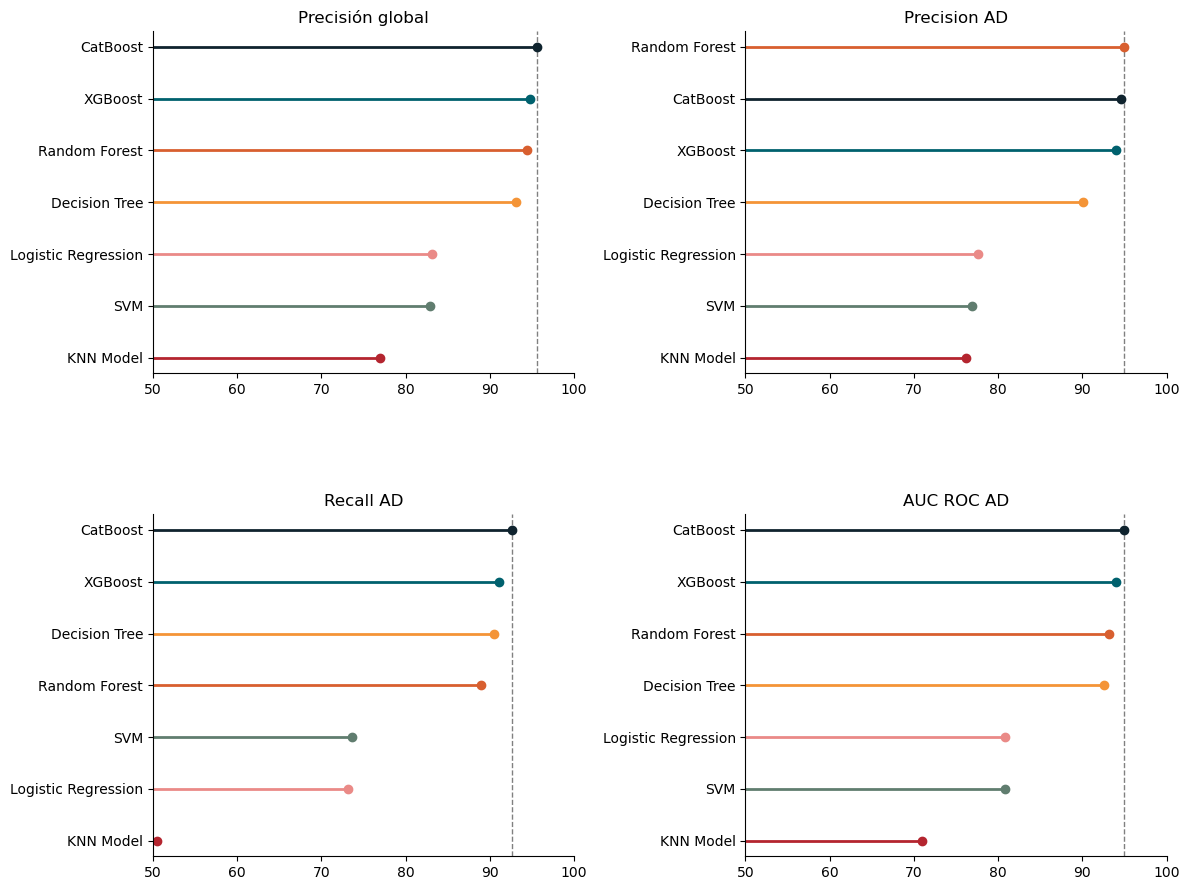

In [7]:
plot_metrics(riskfactors_df, "riskfactors")

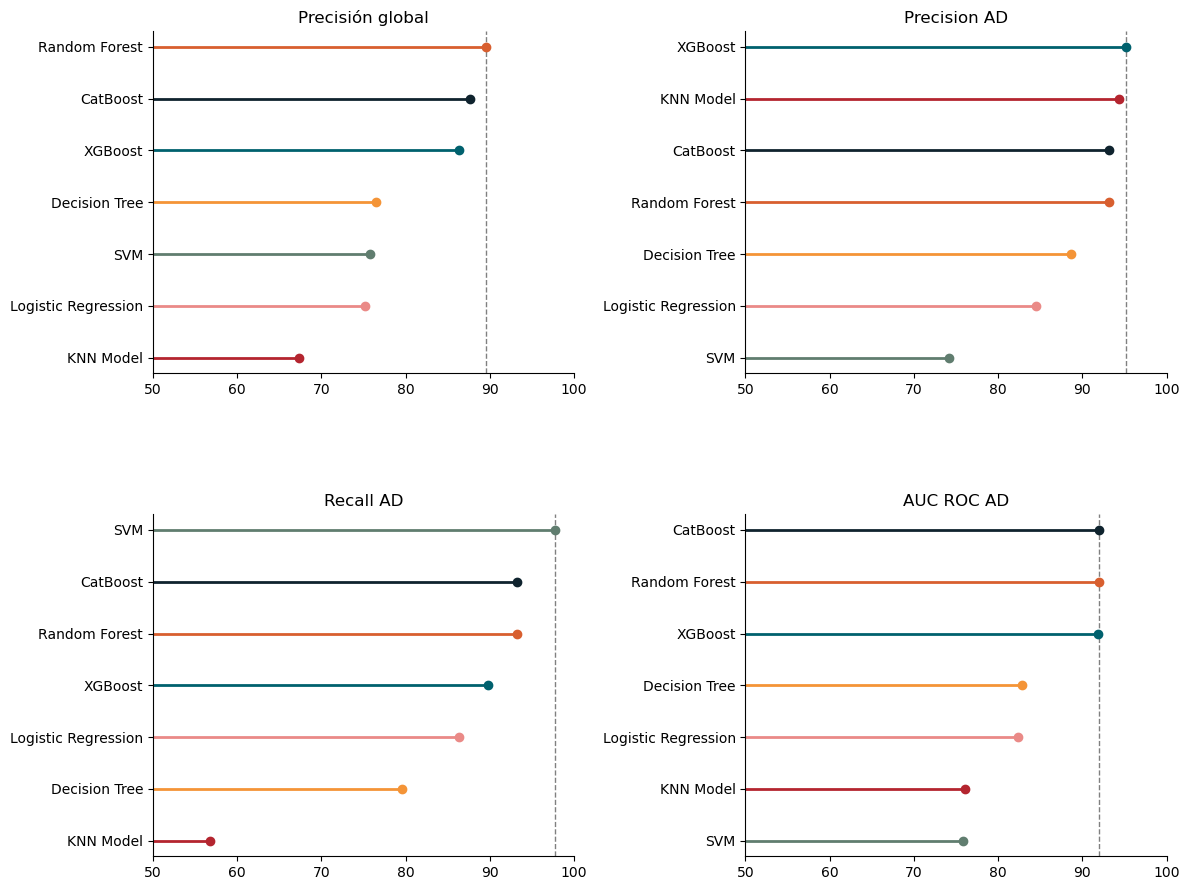

In [8]:
plot_metrics(pvalue_df, "pvalue")

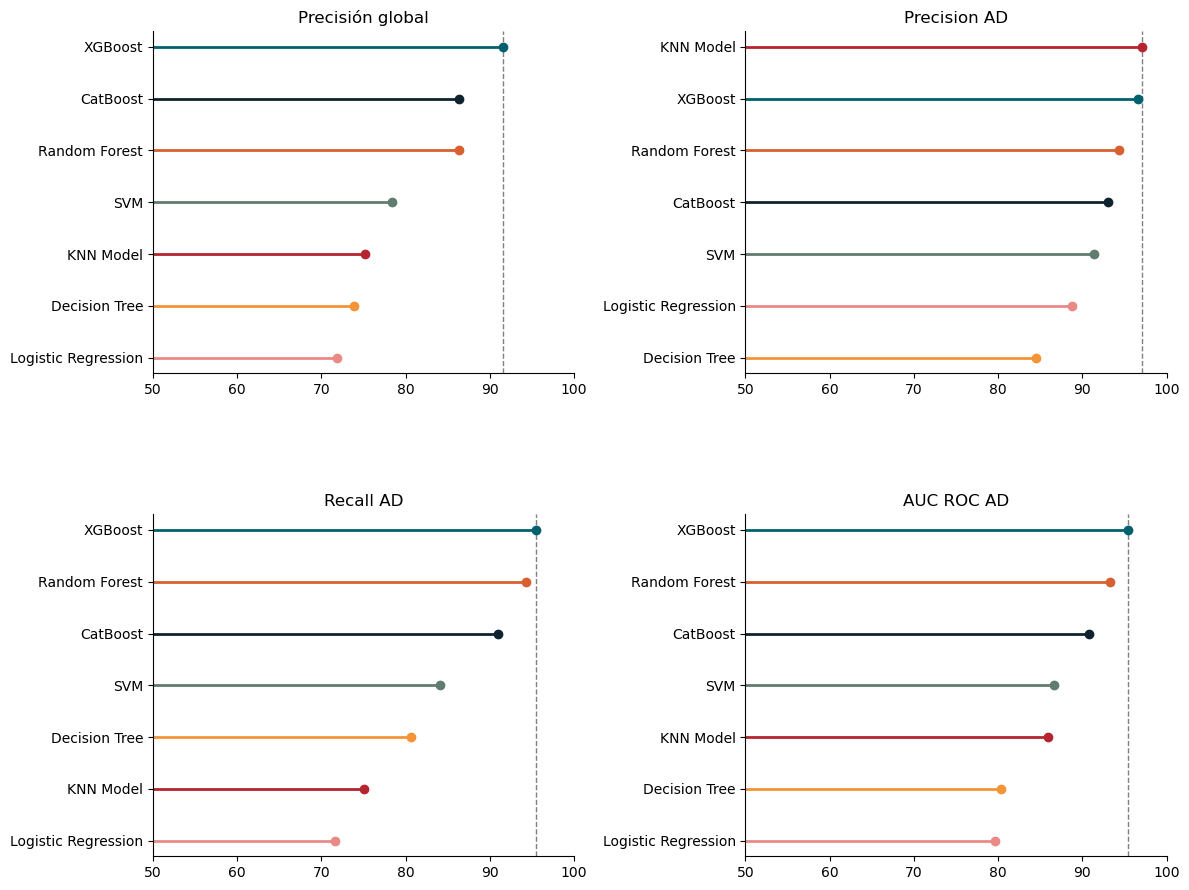

In [9]:
plot_metrics(wrapper_df, "wrapper")

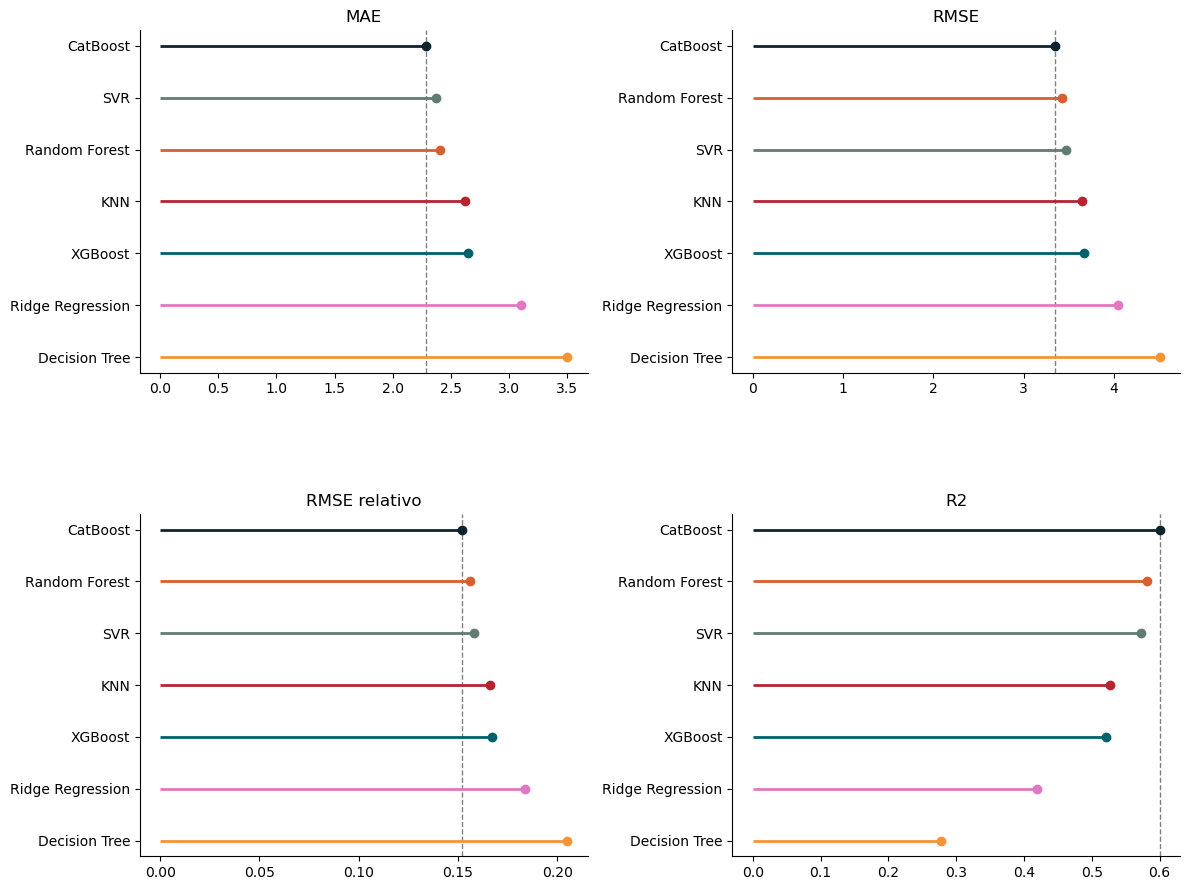

In [4]:
# Definir colores para cada modelo
model_colors = {
    'Decision Tree': '#F49437',
    'Random Forest': '#D85F2F',
    'SVR': '#607D6F',
    'KNN': '#B4252F',
    'Ridge Regression': '#e377c2',
    'XGBoost': '#00616E',
    'CatBoost': '#0F232E'
}


# Métricas a graficar
metrics = ['MAE', 'RMSE', 'RMSE relativo', 'R2']


fig, axes = plt.subplots(2, 2, figsize=(12, 9), sharey=False)
axes = axes.flatten()

for idx, metric in enumerate(metrics):
    ax = axes[idx]
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # Ordenar por la métrica de mayor a menor
    if metric == 'R2':
        df_sorted = mmse_df.sort_values(by=metric, ascending=True)
        y_labels = df_sorted['Modelo']
        x_values = df_sorted[metric]
        colors = [model_colors[model] for model in y_labels]
    
        max_val = x_values.max()
        ax.axvline(max_val, color='grey', linestyle='--', linewidth=1, label=max_val)
    else:
        df_sorted = mmse_df.sort_values(by=metric, ascending=False)
        y_labels = df_sorted['Modelo']
        x_values = df_sorted[metric]
        colors = [model_colors[model] for model in y_labels]
    
        min_val = x_values.min()
        ax.axvline(min_val, color='grey', linestyle='--', linewidth=1, label=min_val)

    # Dibujar líneas horizontales
    ax.hlines(
        y=y_labels,
        xmin=0,
        xmax=x_values,
        color=colors,
        linewidth=2)
    
    for i, (x, y, c) in enumerate(zip(x_values, y_labels, colors)):
        ax.plot(x, y, 'o', markersize=6, color=c)

    ax.set_title(metric)
    ax.grid(False)
    
# Incrementa el padding vertical entre filas
fig.tight_layout(h_pad=7)  

# Guardar como PNG
plt.savefig("./Figuras/metrics_mmse.png", dpi=500)
plt.show()

In [11]:
# Fusionar y añadir una columna que indique el origen
df_combined = pd.concat([riskfactors_df, pvalue_df, wrapper_df], keys=['Risk Factors', 'p-valor', 'Wrapper'])

# Resetear el índice y renombrar la columna de origen
df_combined = df_combined.reset_index().rename(columns={'level_0': 'source'}).drop(columns='level_1')

df_combined

,source,ID,Modelo,Precisión global,Precision AD,Recall AD,AUC ROC AD
0,Risk Factors,1,Decision Tree,93.123,90.052,90.526,92.533
1,Risk Factors,2,Random Forest,94.424,94.944,88.947,93.181
2,Risk Factors,3,SVM,82.900,76.923,73.684,80.808
3,Risk Factors,4,KNN Model,76.952,76.190,50.526,70.953
4,Risk Factors,5,Logistic Regression,83.086,77.654,73.158,80.832
5,Risk Factors,6,XGBoost,94.796,94.022,91.053,93.946
6,Risk Factors,7,CatBoost,95.539,94.624,92.632,94.879
7,p-valor,1,Decision Tree,76.471,88.608,79.545,82.850
8,p-valor,2,Random Forest,89.542,93.182,93.182,91.976
9,p-valor,3,SVM,75.817,74.138,97.727,75.787


In [12]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   source            21 non-null     object 
 1   ID                21 non-null     int64  
 2   Modelo            21 non-null     object 
 3   Precisión global  21 non-null     float64
 4   Precision AD      21 non-null     float64
 5   Recall AD         21 non-null     float64
 6   AUC ROC AD        21 non-null     float64
dtypes: float64(4), int64(1), object(2)
memory usage: 1.3+ KB


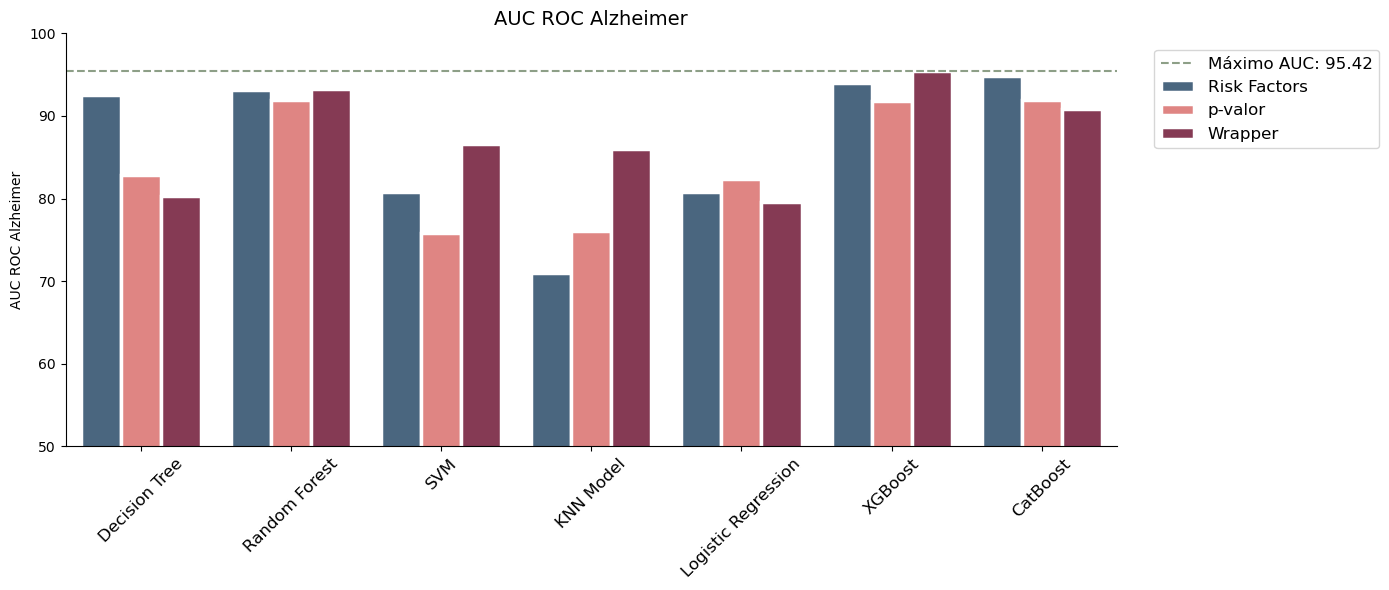

In [13]:
colors = ['#416788', '#EE7674', '#922D50', ] 


plt.figure(figsize=(14, 6))
sns.barplot(data=df_combined, x='Modelo', y='AUC ROC AD', hue='source', palette=colors, linewidth=2.5, edgecolor='1')

max_val = df_combined['AUC ROC AD'].max()
plt.axhline(y=max_val, color='#8D9F87', linestyle='--', label=f'Máximo AUC: {max_val:.2f}')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)


plt.ylabel('AUC ROC Alzheimer')
plt.xlabel('')
plt.xticks(rotation=45, fontsize=12)
plt.ylim(50, 100)
plt.title('AUC ROC Alzheimer', size=14)
plt.legend(title='', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=1, fontsize=12)
plt.tight_layout()

# Guardar como PNG
plt.savefig("./Figuras/grafica_AUC.png", dpi=500)

plt.show()

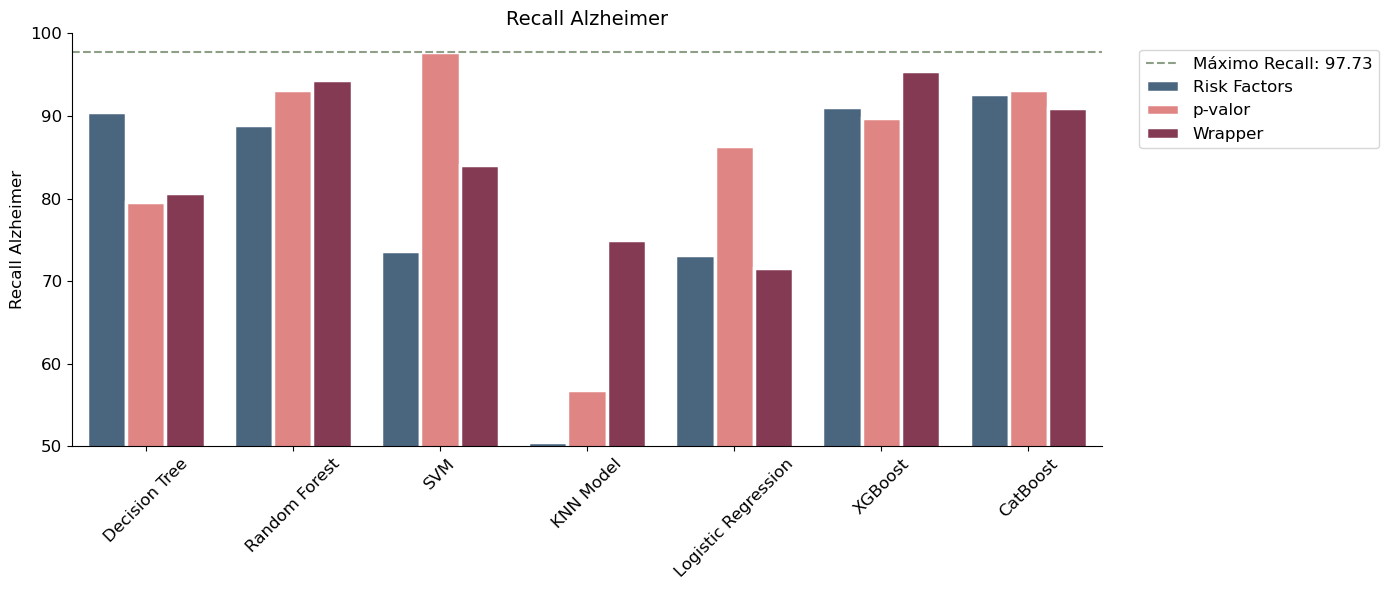

In [14]:
plt.figure(figsize=(14, 6))
sns.barplot(data=df_combined, x='Modelo', y='Recall AD', hue='source', palette=colors, linewidth=2.5, edgecolor='1')

max_val = df_combined['Recall AD'].max()
plt.axhline(y=max_val, color='#8D9F87', linestyle='--', label=f'Máximo Recall: {max_val:.2f}')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.ylabel('Recall Alzheimer', fontsize=12)
plt.xlabel('')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(50, 100)
plt.title('Recall Alzheimer', size=14)

plt.legend(title='', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=1, fontsize=12)
plt.tight_layout()

# Guardar como PNG
plt.savefig("./Figuras/grafica_recall.png", dpi=500)

plt.show()